In [1]:
import requests
from bs4 import BeautifulSoup as b
import os
from fnmatch import fnmatch
import pandas as pd
import json
import time;
from pynput import mouse
import pyautogui
from pynput import keyboard
import shutil
import keyboard as ky
from selenium import webdriver
from selenium.webdriver.common.by import By
import pyperclip


In [ ]:
pip install pyperclip pynput pyautogui selenium beautifulsoup4 pandas

In [ ]:
path_here = os.getcwd();

def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if fnmatch(filename, pattern):
                status = True  
                yield os.path.join(root, filename)
def status(path):
    # r"C:\Drag_data_in_shopee\Bot\Data_shopee" 
    directory_to_search = path+'\Data_lazada'  # เปลี่ยนเป็นไดเรกทอรีที่คุณต้องการค้นหา
    file_pattern = "lazada.xlsx" 
    status = False
    for file_path in find_files(directory_to_search, file_pattern):
        status = True;
    return status;
status(path_here)
def page():
    path_file = './Data_lazada/lazada.xlsx'
    df = pd.read_excel(path_file)
    test ='ant-pagination-item 6'
    num = [];
    num.append(int(df[test][2]))
    os.remove(path_file);
    return num[0];
page()

อุปกรณ์-อิเล็กทรอนิกส์
APRODUCT:::Maket:::lazada, Group:::อุปกรณ์-อิเล็กทรอนิกส์, product:::https://www.lazada.co.th/products/poco-x6-5g-12512gb-1-2024-i5036895256.html, price_product_2:::, price_product_1:::฿11,290.00, image_product_1:::https://lzd-img-global.slatic.net/g/p/5d35f6a02b427079777e9ad5c199fe97.jpg_200x200q80.jpg_.webp, discount:::44% Off, image_product_2:::https://lzd-img-global.slatic.net/g/p/9465d2aaef31725641220860f61a9c00.jpg_80x80q80.jpg_.webp, data_product:::Poco X6 5G 12/512GB เครื่องศูนย์ไทย รับประกันศูนย์ 1 ปี (ปี 2024), price_before:::, Emoji:::, sold:::nan, place:::Bangkok, Recommended_shops:::, count_review:::nanAPRODUCT:::Maket:::lazada, Group:::อุปกรณ์-อิเล็กทรอนิกส์, product:::https://www.lazada.co.th/products/xiaomi-mi-redmi-note-13-snapdragon-685-108-mp-amoled-120hz-2024-15-i5035753238.html, price_product_2:::, price_product_1:::฿6,879.00, image_product_1:::https://lzd-img-global.slatic.net/g/p/3372a14b228faa211595bb7961d67263.jpg_200x200q80.jpg_.webp, di
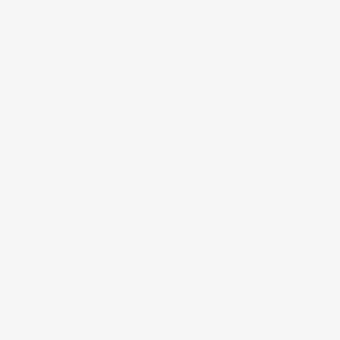
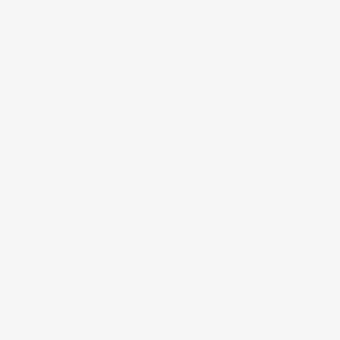
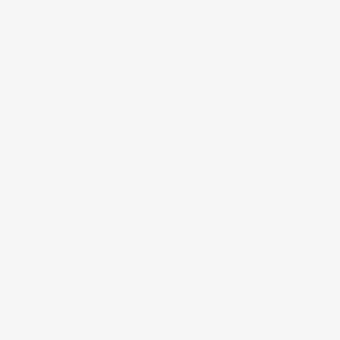
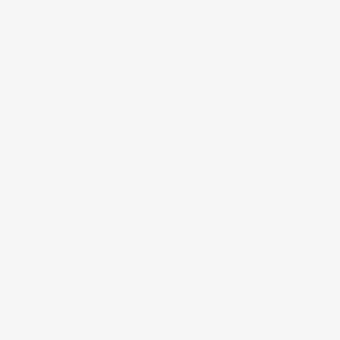
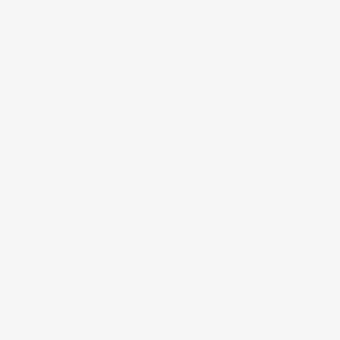
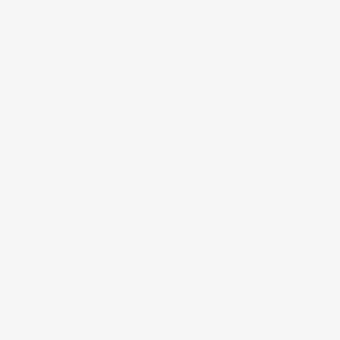
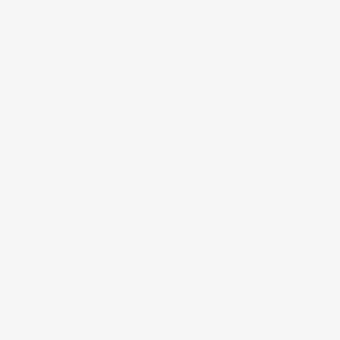
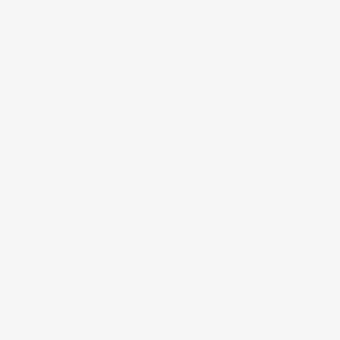
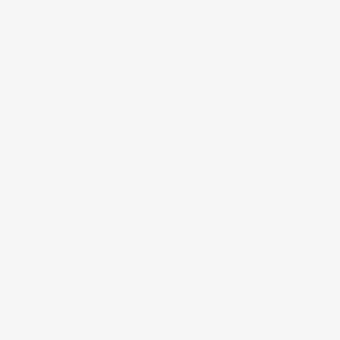
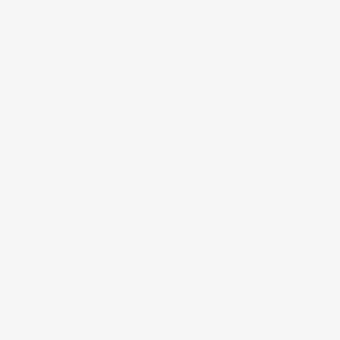
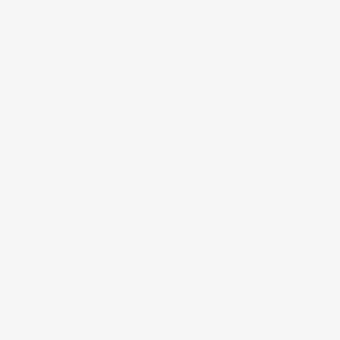
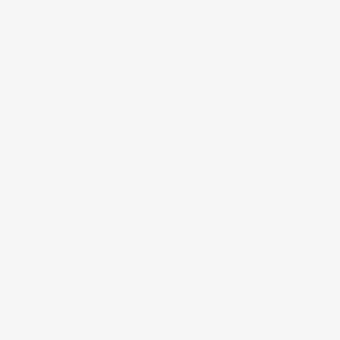
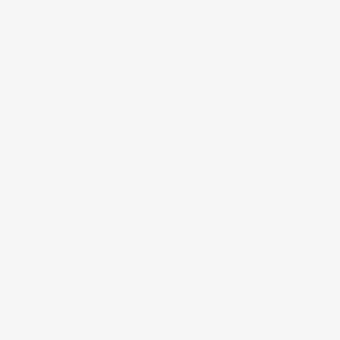
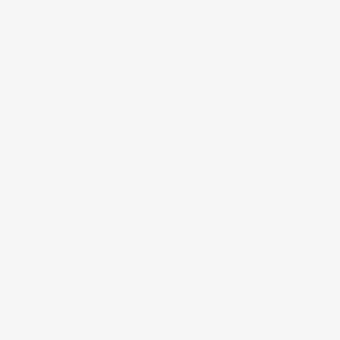
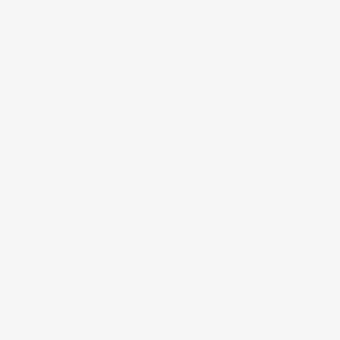
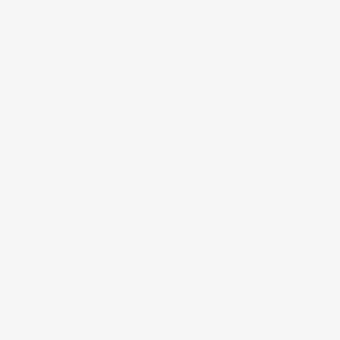
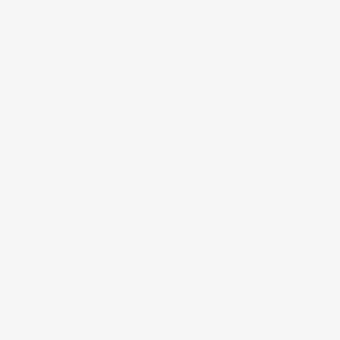
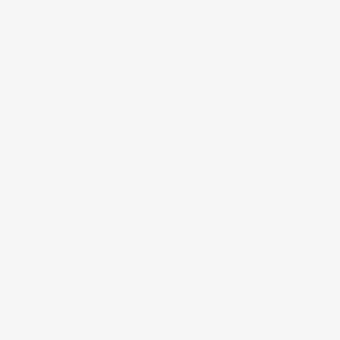
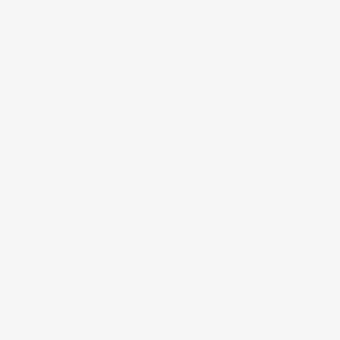
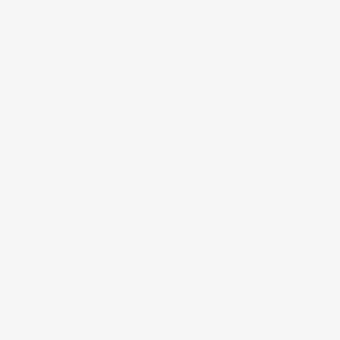
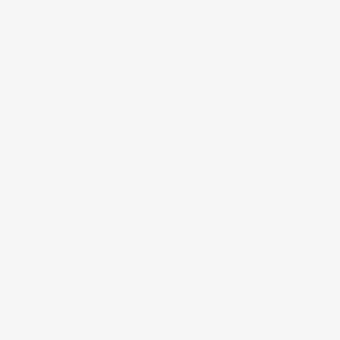
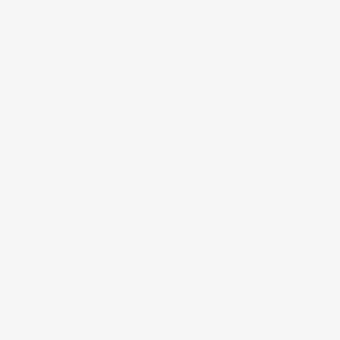

In [10]:
header = ['_95X4G href', 'jBwCF src', 'jBwCF src 2'
          , 'RfADt', 'ooOxS', 'IcOsH',
       '_1cEkb', 'qzqFw', 'oa6ri']
header_Values = {
    '_95X4G href':"product",
    'jBwCF src':"image_product_1",
    'jBwCF src 2':"image_product_2",

    'IcOsH':"discount",
    'RfADt':"data_product", 
    'ooOxS':"price_product",
    '_1cEkb':"sold",
    'qzqFw':"count_review", 
    'oa6ri':"place"
}
def postAPI_DB(data,id_shop):
    try:
        response = requests.post(
            f"https://7faf-223-206-131-122.ngrok-free.app/addb?id={id_shop}&&web=lazada",
            headers={
                "Content-type":"application/x-www-form-urlencoded"
            },
            data={
                 "data":data
            }
        )
    except:
        response = "API error"
    return response
def data_process(path_file,i1,i2,i3,group):
        print(group);
        # path_file = './Data_shopee/Data_1_1_1.xlsx';
        find = pd.read_excel(path_file);
        data_all=[];
        df = pd.read_excel(path_file)
        num_rows, num_columns = df.shape
        Data_everthing=[];
        success_data_text = ""
        for i in range(num_rows):
            data_process = {
                "product":[],
                "price_product_2":[],
                "price_product_1":[],
                "image_product_1":[],
                "discount":[],
                "image_product_2":[],
                "data_product":[],
                "price_before":[],
                "Emoji":[],
                "sold":[],
                "place":[],
                "Recommended_shops":[],
                "count_review":[],
                "maket":[],
                "group":[]
            }
            data = "Product_"+str(i+1);
            Product = {
                data:{
                }
            }
            
            for j in range(len(header)):
                data_input = str(find[header[j]][i]);
                data_process[header_Values[header[j]]]=data_input;
            Product[data]=data_process;
            Product[data]["maket"]="lazada";
            Product[data]["group"]=group;
            # id_shop = f"shop"+str(i1)+"_"+str(i2)+"_"+str(i3);
            id_shop = f'shop{i1}_{i2}_{i3}';
            product = Product[data]["product"]
            image_product_1 = Product[data]["image_product_1"]
            image_product_2 = Product[data]["image_product_2"]
            discount = Product[data]["discount"]
            data_product = Product[data]["data_product"]
            price_product = Product[data]["price_product"]
            sold = Product[data]["sold"].split(" ")[0];
            address = Product[data]["place"]
            count_review = Product[data]["count_review"];
            group_1 = Product[data]["group"],
            maket = Product[data]["maket"];
            # ****************************************************************
            success_data_text += f'APRODUCT:::Maket:::{maket}, Group:::{group}, product:::{product}, price_product_2:::{""}, price_product_1:::{price_product}, image_product_1:::{image_product_1}, discount:::{discount}, image_product_2:::{image_product_2}, data_product:::{data_product}, price_before:::{""}, Emoji:::{""}, sold:::{sold}, place:::{address}, Recommended_shops:::{""}, count_review:::{count_review}'
            data_all.append(Product);
            success_data = {
                 "id":id_shop,
                 "data":data_all
            }
            # ถ้าข้อมูลครบ 60 ค่อยบันทึก .json และส่ง API
            if(i==num_rows-1):
                filename = "Data_process.json"
                with open(filename, 'w', encoding='utf-8') as file:
                    json.dump(success_data, file, indent=2, ensure_ascii=False)
                test = len(Data_everthing);
                # แสดงข้อมูล
                print(success_data_text); #ข้อมูลที่จะส่งไป API
                print(postAPI_DB(success_data_text,id_shop));

data_process('./Data_lazada/data_1_1_1.xlsx',1,1,1,'อุปกรณ์-อิเล็กทรอนิกส์');

In [3]:
# Link_all
def data_link_product():
    
    url = ['https://www.lazada.co.th/?spm=a2o4m.searchlistcategory.breadcrumb.1.31f05424RLChei'];
    return url
data_link_for_lazada  = {
    0: 'อุปกรณ์-อิเล็กทรอนิกส์',
    1: 'อุปกรณ์เสริม-อิเล็กทรอนิกส์', 
    2: 'ทีวีและเครื่องใช้ในบ้าน', 
    3: 'สุขภาพและความงาม', 
    4: 'ทารกและของเล่น', 
    5: 'ของชำและสัตว์เลี้ยง', 
    6: 'บ้านและไลฟ์สไตล์', 
    7: 'แฟชั่นและเครื่องประดับผู้หญิง',
    8: 'แฟชั่นและเครื่องประดับผู้ชาย',
    9: 'กีฬาและการเดินทาง',
    10: 'ยานยนต์และรถจักรยานยนต์'}
# Data_Link
# Link_all
def get_link(i):
    url = data_link_product();
    lazada = 'https://'
    path = '&?spm=a2o4m.home-th.3887232320.46.3a8d7f6dvzndMU'
    data_link_all=[];
    page = requests.get(url[i])
 
    soup = b(page.content,'html.parser')

    all_link = soup.find_all('a');
    j=0;
    for link in all_link:
        
        href = link.get('href','')
        # if (j>=22 and j<=1257 ):
        if (j>=22 and j<=1282 ) and href:
            # if(j!=126 and j!=127 and j!=128):
                data = "https://"+href+"?page=";
                data_link_all.append(data);
        j+=1;
    for i in range(3):
         del data_link_all[126];
    
   
    # print(all_link)
    return(data_link_all)
# Find_file_Donwload_after_change_name
def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if fnmatch(filename, pattern):
                status = True  
                yield os.path.join(root, filename)
def status(path):
    # r"C:\Drag_data_in_shopee\Bot\Data_shopee" 
    directory_to_search = path+'\Data_lazada'  # เปลี่ยนเป็นไดเรกทอรีที่คุณต้องการค้นหา
    file_pattern = "lazada.xlsx" 
    status = False
    for file_path in find_files(directory_to_search, file_pattern):
        status = True;
    return status;
# Check_Header

path = './'
def check_data(path_file):
        header = ['_95X4G href', 'jBwCF src', 'jBwCF src 2',
       'jBwCF src 3', 'RfADt', 'ooOxS', 'IcOsH',
       '_1cEkb', 'qzqFw', 'oa6ri']
       
        df = pd.read_excel(path_file)
       
        is_subset = all(item in df.columns for item in header);
        return is_subset;
# Read Excell
# https://11c2-14-207-200-101.ngrok-free.app/
def postAPI_DB(data,id_shop):
    try:
        response = requests.post(
            f"https://f63e-223-206-131-122.ngrok-free.app/addb?id={id_shop}&&web=lazada",
            headers={
                "Content-type":"application/x-www-form-urlencoded"
            },
            data={
                 "data":data
            }
        )
    except:
        response = "API error"
    return response

header = ['_95X4G href', 'jBwCF src', 'jBwCF src 2'
          , 'RfADt', 'ooOxS', 'IcOsH',
       '_1cEkb', 'qzqFw', 'oa6ri']
header_Values = {
    '_95X4G href':"product",
    'jBwCF src':"image_product_1",
    'jBwCF src 2':"image_product_2",

    'IcOsH':"discount",
    'RfADt':"data_product", 
    'ooOxS':"price_product",
    '_1cEkb':"sold",
    'qzqFw':"count_review", 
    'oa6ri':"place"
}
def data_process(path_file,i1,i2,i3):
        # path_file = './Data_shopee/Data_1_1_1.xlsx';
        find = pd.read_excel(path_file);
        data_all=[];
        df = pd.read_excel(path_file)
        num_rows, num_columns = df.shape
        Data_everthing=[];
        success_data_text = ""
        for i in range(num_rows):
            data_process = {
                "product":[],
                "price_product_2":[],
                "price_product_1":[],
                "image_product_1":[],
                "discount":[],
                "image_product_2":[],
                "data_product":[],
                "price_before":[],
                "Emoji":[],
                "sold":[],
                "place":[],
                "Recommended_shops":[],
                "count_review":[]
            }
            data = "Product_"+str(i+1);
            Product = {
                data:{
                }
            }
            for j in range(len(header)):
                data_input = str(find[header[j]][i]);
                data_process[header_Values[header[j]]]=data_input;
            Product[data]=data_process;
            # id_shop = f"shop"+str(i1)+"_"+str(i2)+"_"+str(i3);
            id_shop = f'shop{i1}_{i2}_{i3}';
            product = Product[data]["product"]
            image_product_1 = Product[data]["image_product_1"]
            image_product_2 = Product[data]["image_product_2"]
            discount = Product[data]["discount"]
            data_product = Product[data]["data_product"]
            price_product = Product[data]["price_product"]
            sold = Product[data]["sold"].split(" ")[0];
            address = Product[data]["place"]
            count_review = Product[data]["count_review"];
            # ****************************************************************
            success_data_text += f'APRODUCT:::product:::{product}, price_product_2:::{""}, price_product_1:::{price_product}, image_product_1:::{image_product_1}, discount:::{discount}, image_product_2:::{image_product_2}, data_product:::{data_product}, price_before:::{""}, Emoji:::{""}, sold:::{sold}, place:::{address}, Recommended_shops:::{""},count_review:::{count_review}'
            data_all.append(Product);
            success_data = {
                 "id":id_shop,
                 "data":data_all
            }
            # ถ้าข้อมูลครบ 60 ค่อยบันทึก .json และส่ง API
            if(i==num_rows-1):
                filename = "Data_process.json"
                with open(filename, 'w', encoding='utf-8') as file:
                    json.dump(success_data, file, indent=2, ensure_ascii=False)
                test = len(Data_everthing);
                # แสดงข้อมูล
                print(success_data_text); #ข้อมูลที่จะส่งไป API
                print(postAPI_DB(success_data_text,id_shop));
# def position_x(x):
#     original_screen_size = [1366,768]
#     original_click_position = (x, 200)
#     new_screen_size = pyautogui.size()
#     new_x = int(original_click_position[0] * (new_screen_size[0] / original_screen_size[0]))
#     return new_x;
# def position_y(y):
#     original_screen_size = [1366,768]
#     original_click_position = (100,y)
#     new_screen_size = pyautogui.size()
#     new_y = int(original_click_position[1] * (new_screen_size[1] / original_screen_size[1]))
#     return new_y;]
path_here = os.getcwd();
def Del():
    folder_path = path_here+'/Data_lazada'
    # ลบไฟล์ทั้งหมดในโฟลเดอร์
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"ไม่สามารถลบไฟล์ {file_path}: {e}");
Del();
Data = [];
def check_data_count(path_file):
        header = ['ant-pagination-item 6']
        df = pd.read_excel(path_file)
        is_subset = all(item in df.columns for item in header);
        return is_subset;
def custom_sleep(seconds):
    time.sleep(seconds)
def Scoll():
    custom_sleep(2);
    for i in range(7):
        pyautogui.scroll(-750);
        custom_sleep(6);
def click(x,y):
    pyautogui.click(x,y);
    custom_sleep(1.5);
def type_and_enter(text):
    controller = keyboard.Controller();
    # controller.type(text);
    pyperclip.copy(text)
    ky.press_and_release('ctrl+v')
    custom_sleep(1);
    
def main(x,t,e,t2,e2):
    controller = keyboard.Controller();
    custom_sleep(3);
    ky.press_and_release('ctrl+t')
    def enter(k):
        for i in range(k):
            controller.press(keyboard.Key.enter);
            controller.release(keyboard.Key.enter);
    def tab(t):
        for i in range(t):
            controller.press(keyboard.Key.tab);
            controller.release(keyboard.Key.tab);
    # input path
    type_and_enter(x);
    custom_sleep(2);
    enter(1)
    # Mouse clicked at (1360, 264) with Button.left
    custom_sleep(4);
    tab(1)
    Scoll();
    ky.press_and_release('ctrl+m');

    custom_sleep(4);
    # Mouse clicked at (834, 114) with Button.left
    # Mouse clicked at (755, 179) with Button.left
# Mouse clicked at (1006, 88) with Button.left
    ky.press_and_release('F11')
    custom_sleep(4);
    tab(t);
    custom_sleep(4);
    enter(e)
    custom_sleep(1);
    tab(t2);
    custom_sleep(1);
    enter(e2)
    # Mouse clicked at (1118, 17) with Button.left
    custom_sleep(2);
    ky.press_and_release('alt+F4')
    # reface
    custom_sleep(1);
    ky.press_and_release('ctrl+w')

# def check_data(path_file):
       
#         header = ['_95X4G href', 'jBwCF src', 'jBwCF src 2',
#        'jBwCF src 3', 'RfADt', 'ooOxS', 'IcOsH',
#        '_1cEkb', 'qzqFw', 'oa6ri']
       
#         df = pd.read_excel(path_file)
#         is_subset = all(item in df.columns for item in header);
#         return is_subset;
# page
def page():
    path_file = './Data_lazada/lazada.xlsx'
    df = pd.read_excel(path_file)
    test ='ant-pagination-item 6'
    num = [];
    num.append(int(df[test][2]))
    os.remove(path_file);
    return num[0];
def change_name(k,i,j):
    path ='.\Data_lazada\data_'+str(k)+'_'+str(i)+'_'+str(j)+'.xlsx'
    path_file = path_here+'\Data_lazada\lazada.xlsx';
    new_file_name = 'data_'+str(k)+'_'+str(i)+'_'+str(j)+'.xlsx'
    # สร้างเส้นทางสำหรับไฟล์ใหม่
    new_file_path = os.path.join(os.path.dirname(path_file), new_file_name)
    # เปลี่ยนชื่อไฟล์
    shutil.move(path_file, new_file_path)
    return path;
def get_link():
    path = "./Data_link/data_link_all.json"
    with open(path, 'r', encoding='utf-8-sig') as file:
        data = json.load(file)
    return data;
if __name__ == "__main__":
    num1=0
    for k in range(len(data_link_for_lazada)):
        num1+=1;
        Data = get_link();
        num2=0;
        data_all = Data[data_link_for_lazada[k]]["lazada"];
        for i in range(len(data_all)):
            num2+=1;
            num3=0;
            status_count = False
            main(data_all[i],1,2,7,1);
            status_lazada = status(path_here);
            for c in range(status_lazada==False):
                main(data_all[i],1,2,7,1);
                if(c==2):
                    break;
            if(status_lazada==True):
                status_count = check_data_count('./Data_lazada/lazada.xlsx')
            if(status_count==True):
                count = page()
                for j in range(count):
                    data_sum=data_all[i]+str(j+1);
                    main(data_sum,8,1,0,0);
                    find_shopee = status(path_here);
                    if(find_shopee==True):
                        num3+=1;
                        path = change_name(num1,num2,num3);
                        print(path);
                        if(check_data(path)==True):
                            data_process(path,num1,num2,num3);
                        else:
                            destination_path = path_here+r'\un_process'
                            shutil.move(path, destination_path)
                            continue;
                    else:
                        continue;
                    print(data_sum);
                custom_sleep(120);
            else:
                continue;

FileNotFoundError: [Errno 2] No such file or directory: './Data_link/data_link_all.json'